In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

## Gathering

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv') # reading twitter-archive-enhanced file

In [3]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#retweet rows 
n = 0
for i in twitter_archive_enhanced.retweeted_status_id:
    if i in twitter_archive_enhanced.tweet_id.values:
        n += 1
print(n)

156


In [5]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url) # here we try to get data from the link above

In [7]:
response # check if response is done correctly or not

<Response [200]>

In [8]:
#response.content

In [9]:
# here we open an empty file and write the content came from response on it.
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [10]:
# reading the file we downloaded to a pandas dataframe 
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t') 

In [11]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# here we will read json file
json_data = pd.DataFrame(columns=['id', 'retweet_count', 'favorite_count']) #these column names will hold the data we will read from json file 

with open('tweet-json.txt', 'r') as file:
    for line in file: # each line is a json object 
        data = json.loads(line)  # here we use json library to turn text to json object so we can deal with it. 
       # geting data from json object by keys
        dic = {'id': data['id'], 'retweet_count': data['retweet_count'],'favorite_count': data['favorite_count']}
        json_data = json_data.append(dic, ignore_index=True) # appending data to our dataframe

In [13]:
json_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing 

In [14]:
#twitter_archive_enhanced
#image_predictions
#json_data

In [15]:
twitter_archive_enhanced.tail(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
2257,667728196545200128,NaN,NaN,2015-11-20 15:36:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Olive. He comes to spot by tree to remini...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667728196...,11,10,Olive,None,None,None,None
2258,667724302356258817,NaN,NaN,2015-11-20 15:20:54 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",What a dog to start the day with. Very calm. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667724302...,7,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2262,667546741521195010,NaN,NaN,2015-11-20 03:35:20 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Here is George. George took a selfie of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667546741...,9,10,George,None,None,None,None
2263,667544320556335104,NaN,NaN,2015-11-20 03:25:43 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Kial. Kial is either wearing a cape, w...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667544320...,10,10,Kial,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
2265,667534815156183040,NaN,NaN,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,None,None,None


In [16]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_archive_enhanced.query('name == "None"') # from previous visual assessing we saw names with 'None' as a value so we try to look at it.

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [18]:
# check visually if there is a tweet with two dog type or not
# and we find that there is dogs with two types 
copy_to_check = twitter_archive_enhanced.copy()

copy_to_check = copy_to_check.query('doggo != "None" or floofer != "None" or pupper != "None" or puppo != "None"')
copy_to_check

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
71,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,None,None,None,puppo
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
sum(image_predictions.jpg_url.isnull()) # see if there is missing image urls

0

In [22]:
json_data.head(20)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [23]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [24]:
json_data.query('retweet_count == "None"')

,id,retweet_count,favorite_count


In [25]:
json_data.query('favorite_count == "None"')

,id,retweet_count,favorite_count


### Quality

##### `twitter_archive_enhanced` table
- <a href="#q1">[1]</a> there are missing values in name column written as "None" (completeness)  instead of NaN which represents empty value
- <a href="#q2">[2]</a> we have dogs with no type and text "None" instead of NaN which represents empty value
- <a href="#q3">[3]</a> removing retweeted rows
- <a href="#q4">[4]</a> there are dogs with two types
- <a href="#q5">[5]</a> rating_numerator column data type is integer instead of float
- <a href="#q6">[6]</a> rating numerator in the text not equal the rating numerator column so we will extract numerator from text and edit numerator column
##### `json_data` table
- <a href="#q7">[7]</a> retweet_count, favorite_count and columns type is object instead of int
- <a href="#q8">[8]</a> id column type is object instead of int which may cause error while joining 
- <a href="#q9">[9]</a> id column should be renamed as "tweet_id" to avoid problem while joining 

### Tidinees

- <a href="#q10">[10]</a> in `twitter_archive_enhanced` table: doggo, floofer, pupper and puppo should be in one column (each varible is a coloumn)
- <a href="#q11">[11]</a> retweet_count and favorite_count in `json_data` table - we get from json- and `image predictions` table should belong to twitter_archive_enhanced table

## Cleaning

##### `twitter_archive_enhanced` table :  
##### <a  id="q1">[1]</a> there are missing values in name column written as "None" (completeness)"


##### Define

1- we can't find missing names so we will replace the string value "None" by NaN with means empty.  <br>

#### Code:

In [26]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()

In [27]:
twitter_archive_enhanced_clean.name.replace("None", np.NaN, inplace=True)

#### Test:

In [28]:
twitter_archive_enhanced_clean.head(10)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [29]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### <a  id="q2">[2]</a> we have dogs with no type written as "None

#### Define:

- we have missing dog type values and can not find it this may effect our insights so we will replace "None" value by NaN which means empty we will do it after tidness because after tidness it will be easier you can go to step here <a href="#qt">Quality with tidiness issue</a>

##### <a  id="q3">[3]</a> removing retweeted rows

#### Dfine:

- We will choose tweets only using boolean indexing so if retweet_status_id is null which means the tweet is not retweet then we wiil choose it.




#### code

In [30]:
number_of_retweets = sum((~twitter_archive_enhanced_clean.retweeted_status_id.isnull()))
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweeted_status_id.isnull()]

In [31]:
twitter_archive_enhanced_clean.reset_index(drop=True, inplace=True)

In [32]:
number_of_retweets

181

#### Test:

In [33]:
sum(~twitter_archive_enhanced_clean.retweeted_status_id.isnull())

0

#####  <a id="q4">[4]</a> there are dogs with two types

#### Define: 

- we will remove one of two types and keep only one type. We will solve this issue after tidness to become easer <a href="#qt2">Click to go to the solution</a>

#### <a id="q5">[5]</a> rating_numerator column data type is integer instead of float

#### Define: 

- we will cast type of rating_numerator from integer to float

#### Code:

In [34]:
twitter_archive_enhanced_clean.rating_numerator = twitter_archive_enhanced_clean.rating_numerator.astype(float)

#### Test:

In [35]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(5), int64(2), object

##### <a id="q6">[6]</a> rating numerator in the text not equal the rating numerator column so we will extract numerator from text and edit numerator column

#### Define:

- we will replace rating values in numerator column with non rating values in text column using replace method

#### Code:

In [36]:
# Here we Get rating from text and put it to rating_numerator column it takes some seconds
for i in range(0, len(twitter_archive_enhanced_clean)): # loop from each tweet text
    text = twitter_archive_enhanced_clean.iloc[i].text
    #print(type(text))
    #print(text)
    dog_rate = np.NaN
    #print(text)
    #print(len(text))
    for r in range(0, len(text)):
        c = text[r]
        #print(c)
        if c == '/':
            five_digit_float = text[r-5:r]
            four_digit_float = text[r-4:r]
            three_digit_float = text[r-3:r]
            two_digit_float = text[r-2:r]
            one_digit_float = text[r-1:r]
            #print(five_digit_float)
            #print(four_digit_float)
            #print(three_digit_float)
            #print(two_digit_float)
            #print(one_digit_float)
            is_five = True
            is_four = True
            is_three = True
            is_two = True
            is_one = True
            try:
                five_digit_float = float(five_digit_float)
            except(ValueError):
                is_five = False    
            try:
                four_digit_float = float(four_digit_float)
            except(ValueError):
                is_four = False
            try:
                three_digit_float = float(three_digit_float)
            except(ValueError):
                is_three = False
            try:
                two_digit_float = float(two_digit_float)
            except(ValueError):
                is_two = False
            try:
                one_digit_float = float(one_digit_float)
            except(ValueError):
                is_one = False

            if is_five:
                dog_rate = five_digit_float
                #print(dog_rate)
                break
            elif is_four:
                dog_rate = four_digit_float
                #print(dog_rate)
                break
            elif is_three:
                dog_rate = three_digit_float
                #print(dog_rate)
                break
            elif is_two:
                dog_rate = two_digit_float
                #print(dog_rate)
                break
            elif is_one:
                dog_rate = one_digit_float
                #print(dog_rate)
                break
            else:
                dog_rate = np.NaN
                #print(dog_rate)

    if dog_rate != np.NaN:
            twitter_archive_enhanced_clean.at[i,'rating_numerator'] = dog_rate

#### Test:

In [37]:
twitter_archive_enhanced_clean.query('tweet_id==883482846933004288')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
42,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,None,None,None,None


##### `json_data` table:

##### <a  id="q7">[7]</a> retweet_count, favorite_count and columns type is object instead of int
##### <a  id="q8">[8]</a> id column type is object instead of int which may cause error while joining

#### Define

- we will chenge the data type of retweet_count column and favorite_count column from object to integer using astype function

##### Code

In [38]:
json_data_clean = json_data.copy()

In [39]:
json_data_clean.id = json_data_clean.id.astype(int)
json_data_clean.retweet_count = json_data_clean.retweet_count.astype(int)
json_data_clean.favorite_count = json_data_clean.favorite_count.astype(int)

#### Test

In [40]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


##### <a id="q9">[9]</a> id column should be renamed as "tweet_id" to avoid problem while joining 

#### Define: 

- we will rename id column to be tweet_id using rename function 

#### Code:

In [41]:
json_data_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test: 

In [42]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


##### `twitter_archive_enhanced` table :  
##### <a  id="q10">[10]</a> in `twitter_archive_enhanced` table: doggo, floofer, pupper and puppo should be in one column (each varible is a coloumn)

##### Define: we will use melt function to make 4 columns of dog type in one column called dog_type

##### Code:

In [43]:
twitter_archive_enhanced_clean = pd.melt(twitter_archive_enhanced_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                       var_name='value', value_name='dog_type'
                                        )
twitter_archive_enhanced_clean.drop(axis=1, columns=['value'], inplace=True)

##### Test:

In [44]:
twitter_archive_enhanced_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,NaN,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo


In [45]:
len(twitter_archive_enhanced_clean), len(twitter_archive_enhanced) # duplicated rows appears after using melt function

(8700, 2356)

###### define: we will replace value of dog_type column "None"  with NaN value with means empty using replace function  <a id="qt">Quality with tidness issue</a>

###### Code: 

In [46]:
twitter_archive_enhanced_clean.dog_type.replace("None", np.NaN, inplace=True)

##### Test: 

In [47]:
twitter_archive_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN


In [48]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 14 columns):
tweet_id                      8700 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     8700 non-null object
source                        8700 non-null object
text                          8700 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 8468 non-null object
rating_numerator              8700 non-null float64
rating_denominator            8700 non-null int64
name                          5980 non-null object
dog_type                      356 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 951.6+ KB


#### Quality issue appears: duplicated rows in `twitter_archive_enhanced_clean` table after using melt function each tweet duplicated 4 times

### Clean

##### `twitter_archive_enhanced_clean` table

#### dfine:

- we will remove duplicated rows using boolean indexing. we want to keep it only one tweet with no dog type and keep other tweet with dog type

#### Code:

In [49]:
# the code below keep two things only one tweet with no dog_type and tweets with dog_types so we have some duplicated rows after this process
# beacuse tweets with dog type will be found again with null dog type
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.tweet_id.duplicated() | twitter_archive_enhanced_clean.dog_type.notnull()]

In [50]:
# here we will remove the remaining duplicated rows
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.tweet_id.duplicated(keep=False) | twitter_archive_enhanced_clean.dog_type.notnull()]
twitter_archive_enhanced_clean.reset_index(drop=True, inplace=True) # here we doing reindexing

#### Test:

In [51]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2187 entries, 0 to 2186
Data columns (total 14 columns):
tweet_id                      2187 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2187 non-null object
source                        2187 non-null object
text                          2187 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2129 non-null object
rating_numerator              2187 non-null float64
rating_denominator            2187 non-null int64
name                          1500 non-null object
dog_type                      356 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 239.3+ KB


<a id="qt2"></a>

#### Solving quality issue : Dogs with two types

In [52]:
sum(twitter_archive_enhanced_clean.tweet_id.duplicated())

12

#### Code:

In [53]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.tweet_id.duplicated()]
twitter_archive_enhanced_clean.reset_index(drop=True, inplace=True)

#### Test:

In [54]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          1495 non-null object
dog_type                      344 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 238.0+ KB


In [55]:
len(twitter_archive_enhanced_clean), len(twitter_archive_enhanced) - number_of_retweets

(2175, 2175)

#### `twitter_archive_enhanced_clean` table:

- <a id="q11">[11]</a> retweet_count and favorite_count in `json_data` table - we get from json- and `image predictions` table should belong to twitter_archive_enhanced table

#### Define:

we will join three tables using melt function

#### Code: 

In [56]:
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, image_predictions, on=['tweet_id'], how='left')
twitter_archive_enhanced_clean = pd.merge(twitter_archive_enhanced_clean, json_data_clean, on=['tweet_id'], how='left')

#### Test:

In [57]:
for column in (list(image_predictions) + list(json_data_clean)):
    if column not in list(twitter_archive_enhanced_clean):
        print("error in joins")

## another Quality issue appears here : after joining retweet_count and favourite_count columns data types turn into float so we will turn it to integer

In [58]:
#twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.retweet_count.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [59]:
#twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean.retweet_count.isnull()]

In [60]:
twitter_archive_enhanced_clean.retweet_count = twitter_archive_enhanced_clean.retweet_count.astype(int)
twitter_archive_enhanced_clean.favorite_count = twitter_archive_enhanced_clean.favorite_count.astype(int)

In [728]:
twitter_archive_enhanced_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Visualizations and Insights:
- our analysis aim to answers these quetions: <br>
1- what's the dog type which have the largest number of retweets? <a href="#fig1">Figure[1]</a><br>
2- what's the dog type which have the largest number of retweet in average?<a href="#fig2">Figure[2]</a><br>
3- what's the dog type which have the largest number of favorites?<a href="#fig3">Figure[3]</a><br>
4- what's the dog type which have the largest number of favorites in average?<a href="#fig4">Figure[4]</a><br>
5- what's the dog type which have the largest rating?<a href="#fig5">Figure[5]</a><br>
6- what's the dog type which have the largest rating in average?<a href="#fig6">Figure[6]</a>

In [729]:
twitter_archive_enhanced_clean.dog_type.unique()

array([nan, 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [730]:
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 27 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null float64
rating_denominator            2175 non-null int64
name                          1495 non-null object
dog_type                      344 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null float64
p1                            1994 non-null object
p1_conf                       1994 n

In [731]:
grouped_df = twitter_archive_enhanced_clean.groupby('dog_type') # here we group with dog_type

In [732]:
retweet_count_summtion_by_dog_type = grouped_df.retweet_count.sum()
retweet_count_average_by_dog_type = grouped_df.retweet_count.mean()
favorite_count_summtion_by_dog_type = grouped_df.favorite_count.sum()
favorite_count_average_by_dog_type = grouped_df.favorite_count.mean()
max_rating_numerator_by_dog_type = grouped_df.rating_numerator.max()
avg_rating_numerator_by_dog_type = grouped_df.rating_numerator.mean()

#### 1- what's the dog type which have the largest number of retweets ?

In [733]:
retweet_count_summtion_by_dog_type[retweet_count_summtion_by_dog_type.values == retweet_count_summtion_by_dog_type.max()]

dog_type
pupper    550530
Name: retweet_count, dtype: int64

<a id="fig1"></a>

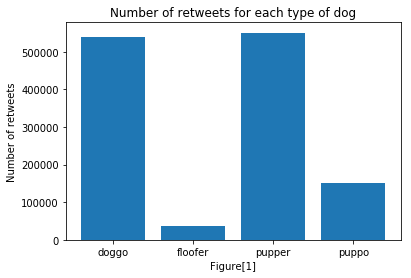

In [734]:
dogs = retweet_count_summtion_by_dog_type.index
h = np.arange(len(dogs))
retweets = retweet_count_summtion_by_dog_type.values

plt.bar(h, retweets)
plt.xticks(h, dogs)
plt.ylabel('Number of retweets')
plt.xlabel('Figure[1]')
plt.title('Number of retweets for each type of dog')

plt.show()

####  2- what's the dog type which have the largest number of retweets in average?

In [735]:
retweet_count_average_by_dog_type[retweet_count_average_by_dog_type.values == retweet_count_average_by_dog_type.max()]

dog_type
puppo    6332.5
Name: retweet_count, dtype: float64

<a id="fig2"></a>

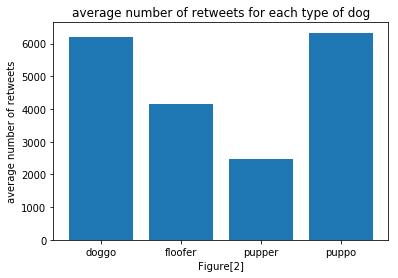

In [736]:
dogs = retweet_count_average_by_dog_type.index
h = np.arange(len(dogs))
retweets = retweet_count_average_by_dog_type.values

plt.bar(h, retweets)
plt.xticks(h, dogs)
plt.ylabel('average number of retweets')
plt.xlabel('Figure[2]')
plt.title('average number of retweets for each type of dog')

plt.show()

#### 3- what's the dog type which have the largest number of favorites?

In [737]:
favorite_count_summtion_by_dog_type[favorite_count_summtion_by_dog_type.values == favorite_count_summtion_by_dog_type.max()]

dog_type
pupper    1607484
Name: favorite_count, dtype: int64

<a id="fig3"></a>

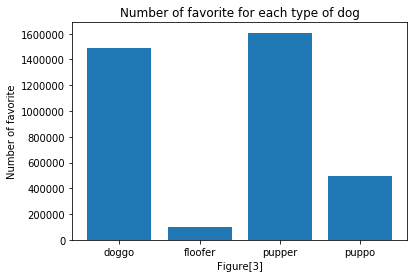

In [738]:
dogs = favorite_count_summtion_by_dog_type.index
h = np.arange(len(dogs))
retweets = favorite_count_summtion_by_dog_type.values

plt.bar(h, retweets)
plt.xticks(h, dogs)
plt.ylabel('Number of favorite')
plt.xlabel('Figure[3]')
plt.title('Number of favorite for each type of dog')

plt.show()

#### 4- what's the dog type which have the largest number of favorites in average?

In [739]:
favorite_count_average_by_dog_type[favorite_count_average_by_dog_type.values == favorite_count_average_by_dog_type.max()]

dog_type
puppo    20788.875
Name: favorite_count, dtype: float64

<a id="fig4"></a>

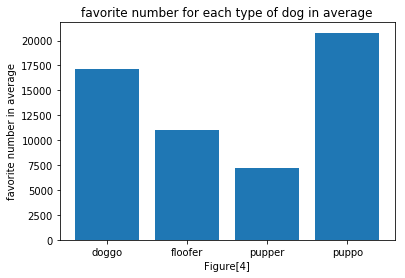

In [740]:
dogs = favorite_count_average_by_dog_type.index
h = np.arange(len(dogs))
retweets = favorite_count_average_by_dog_type.values

plt.bar(h, retweets)
plt.xticks(h, dogs)
plt.ylabel('favorite number in average')
plt.xlabel('Figure[4]')
plt.title('favorite number for each type of dog in average')

plt.show()

#### 5- what's the dog type which have the largest rate?

In [746]:
max_rating_numerator_by_dog_type[max_rating_numerator_by_dog_type.values == max_rating_numerator_by_dog_type.max()]

dog_type
doggo     14.0
pupper    14.0
puppo     14.0
Name: rating_numerator, dtype: float64

<a id="fig5"></a>

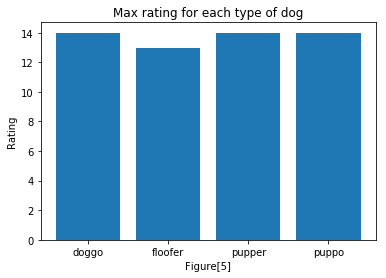

In [742]:
dogs = max_rating_numerator_by_dog_type.index
h = np.arange(len(dogs))
rate = max_rating_numerator_by_dog_type.values

plt.bar(h, rate)
plt.xticks(h, dogs)
plt.ylabel('Rating')
plt.xlabel('Figure[5]')
plt.title('Max rating for each type of dog')

plt.show()

#### 6- what's the dog type which have the largest rating in average?

In [743]:
avg_rating_numerator_by_dog_type[avg_rating_numerator_by_dog_type.values == avg_rating_numerator_by_dog_type.max()]

dog_type
puppo    12.041667
Name: rating_numerator, dtype: float64

<a id="fig6"></a>

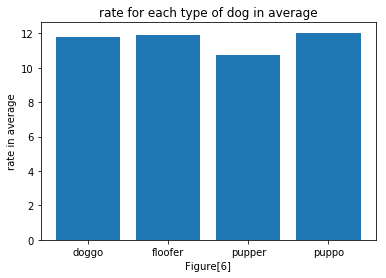

In [744]:
dogs = avg_rating_numerator_by_dog_type.index
h = np.arange(len(dogs))
ratings = avg_rating_numerator_by_dog_type.values

plt.bar(h, ratings)
plt.xticks(h, dogs)
plt.ylabel('rate in average')
plt.xlabel('Figure[6]')
plt.title('rate for each type of dog in average')

plt.show()

### Insights: 

1- the dog type which have the largest number of retweets is pupper with value = 550530 retweets <br>
2- the dog type which have the largest number of retweets in average is puppo with value = 6332.5 retweets <br>
3- the dog type which have the largest number of favorites is pupper with value = 1607484 favorites<br> 
4- the dog type which have the largest number of favorites in average is puppo with value = 20788.875 favorites <br>
5- the dog type which have the largest rate are doggo = 14.0, pupper = 14.0 and puppo = 14.0 <br>
6- the dog type which have the largest rating in average is puppo with value = 12.041667

- we say that the dog type which has large number of retweets has large number of favorites also.

## Storing

In [745]:
twitter_archive_enhanced_clean.to_csv('twitter_archive_master')

## References: 

1- The code used to draw bar charts: https://pythonspot.com/matplotlib-bar-chart/ <br>
2- The code used in boolean indexing: https://stackoverflow.com/questions/53413077/python-pandas-remove-duplicate-rows-that-have-a-column-value-nan